In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [3]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")

merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_dense_vector_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_dense_vector_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_dense_vector_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_dense_vector_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201811131126


In [4]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()

,mfc/s,num_threads,vector_size
0,35.1663,1,100000
1,61.2999,2,100000
2,90.1417,3,100000
3,113.0220,4,100000
4,142.7730,5,100000


In [5]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [6]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [7]:
hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
100000,36.65065,67.74116,96.08999,118.7914,138.9069,171.8045,181.2588,197.2673,197.31420,186.81564,219.22460,209.0035,183.203942,206.76020,201.56190,218.01440
200000,37.97518,75.93075,104.73310,136.1658,172.1345,207.9503,226.2045,240.7643,246.15090,269.69050,287.68190,290.8108,276.148130,277.65371,329.69130,307.62251
300000,39.67519,76.92422,113.54550,154.9341,176.3358,213.8106,237.7857,275.3740,237.39531,285.83800,308.72270,344.3203,327.960590,351.77470,412.15760,382.10320
400000,38.62301,78.70288,116.57220,153.2564,186.0237,238.6875,264.9587,289.6868,258.96422,312.22080,335.31370,355.7165,380.573900,372.41598,382.53232,408.60695
500000,39.30164,78.61433,116.36760,157.4074,195.2241,240.5423,264.1007,297.8438,291.28460,297.12461,354.87870,394.9539,394.591900,417.83050,450.59110,437.54994
600000,40.82329,79.02596,119.43900,158.2320,197.1942,244.7744,286.7219,322.4606,289.49140,329.79160,361.40480,407.3985,436.937300,425.08701,508.16650,504.20270
700000,41.61821,80.26783,123.16950,162.0544,199.3900,254.1367,276.3445,320.7173,298.04120,338.31760,373.43690,398.3911,437.753000,480.90910,492.68960,524.92750
800000,42.06919,81.07797,118.90250,164.9367,200.6456,251.8519,283.8542,325.5928,301.33440,288.49293,337.40079,424.7007,426.565460,489.78060,508.78690,477.99573
900000,40.23964,81.32432,122.17350,164.2408,194.7980,258.0625,292.7449,328.5588,294.06030,345.27100,384.43830,424.3523,432.999760,495.88760,501.28810,587.35440


In [8]:
openmp_1_2.pivot('vector_size','num_threads','mfc/s')

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
100000,16.13583,20.36812,23.35936,22.57909,22.00143,22.23664,20.98947,20.94546,21.34833,20.51453,16.336345,17.017958,16.014356,13.008523,15.278619,12.453277
200000,23.26980,31.56799,36.80222,40.58192,39.64739,39.55126,40.48152,39.21574,39.22236,37.80544,33.790220,29.185850,25.299910,28.917790,21.087340,26.681950
300000,25.74888,38.12312,47.44074,52.49181,54.13006,55.60409,55.74878,54.76219,55.93080,53.23758,51.540450,46.865930,38.117360,46.214260,36.239730,35.086640
400000,27.94673,43.20906,54.23327,59.55086,64.42754,68.02805,67.26449,68.73711,68.97852,68.70174,59.276110,62.609710,62.909460,51.813010,52.107860,40.170590
500000,30.04600,46.03428,58.96416,67.90736,74.27109,76.59246,76.65168,80.27090,79.27978,77.22155,74.050570,78.048810,61.685400,66.168430,51.564480,55.417830
600000,29.71887,48.12331,63.34021,73.61023,80.32890,86.21042,85.29502,93.46152,92.30793,91.83714,90.064440,84.906580,70.732830,74.923860,81.337590,53.436490
700000,30.47819,50.87935,66.81034,79.42407,87.51652,91.39413,97.23775,91.32153,98.65298,101.98067,101.913980,98.691690,77.598990,79.711160,76.745440,69.314920
800000,31.11572,52.38954,69.55362,84.51016,93.99581,100.09952,105.55840,109.33660,107.44160,109.86890,108.011130,103.944340,89.501410,79.925190,84.273990,80.487210
900000,31.89648,54.16934,72.83258,87.52807,98.38451,104.28060,109.60890,115.94050,115.10982,115.28326,116.065510,116.382490,102.227290,94.510220,107.064280,91.475050


how many distinct thread do you have?16
how many vector size group do you have?10


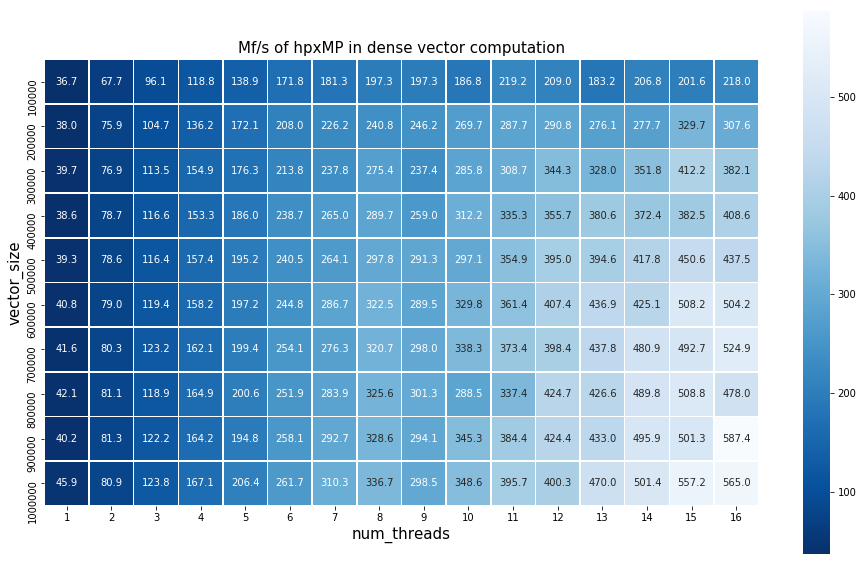

In [10]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in dense vector computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


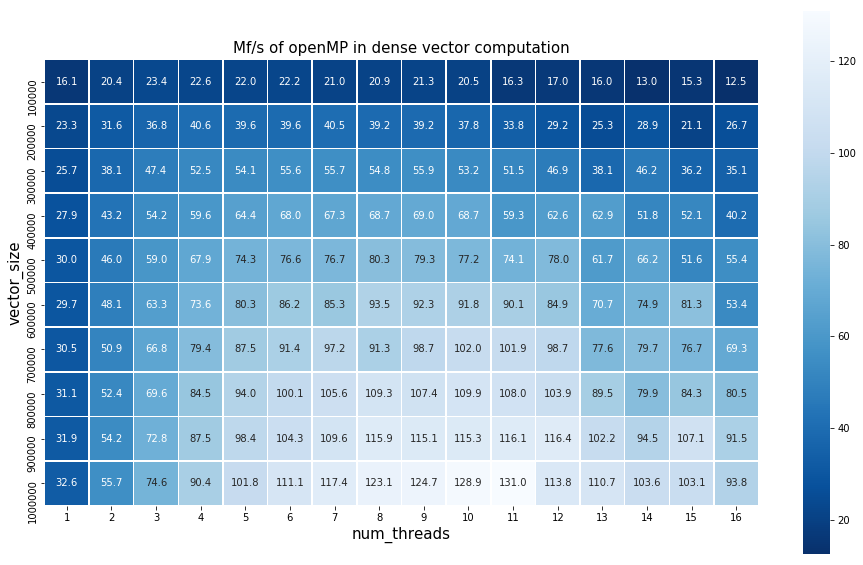

In [11]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in dense vector computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [12]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [13]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [14]:
pivot_table_diff.head(16)

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
100000,2.271383,3.325843,4.113554,5.261124,6.313540,7.726190,8.635702,9.418141,9.242606,9.106504,13.419440,12.281350,11.439982,15.894210,13.192416,17.506589
200000,1.631951,2.405308,2.845836,3.355332,4.341635,5.257741,5.587846,6.139481,6.275780,7.133643,8.513762,9.964102,10.914985,9.601484,15.634561,11.529236
300000,1.540851,2.017784,2.393418,2.951586,3.257632,3.845232,4.265308,5.028543,4.244447,5.369102,5.989911,7.346921,8.603969,7.611822,11.373087,10.890276
400000,1.382023,1.821444,2.149459,2.573538,2.887332,3.508663,3.939058,4.214416,3.754273,4.544584,5.656810,5.681491,6.049550,7.187692,7.341164,10.171794
500000,1.308049,1.707735,1.973531,2.317973,2.628534,3.140548,3.445465,3.710483,3.674135,3.847690,4.792383,5.060345,6.396844,6.314650,8.738401,7.895472
600000,1.373649,1.642156,1.885674,2.149593,2.454835,2.839267,3.361532,3.450196,3.136149,3.591048,4.012736,4.798197,6.177291,5.673587,6.247622,9.435551
700000,1.365508,1.577611,1.843569,2.040369,2.278313,2.780668,2.841947,3.511957,3.021107,3.317468,3.664236,4.036724,5.641220,6.033146,6.419790,7.573081
800000,1.352024,1.547598,1.709508,1.951679,2.134623,2.516015,2.689073,2.977894,2.804634,2.625792,3.123759,4.085847,4.766019,6.127988,6.037295,5.938779
900000,1.261570,1.501298,1.677457,1.876436,1.979966,2.474693,2.670813,2.833857,2.554607,2.994979,3.312253,3.646187,4.235657,5.246920,4.682123,6.420925


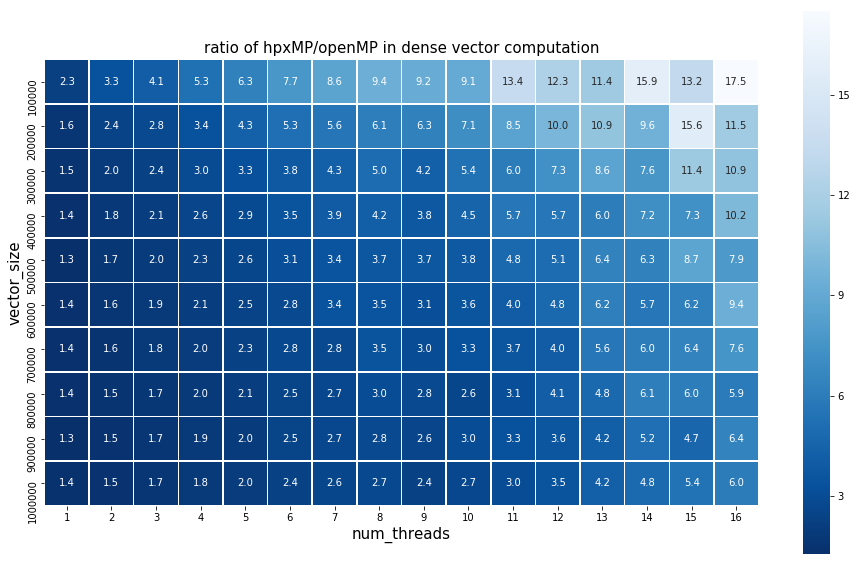

In [17]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in dense vector computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [18]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")